In [101]:
import pickle
import json
import os
import utils

import pandas as pd

from sklearn.metrics import ndcg_score

In [102]:
dir = 'output/random/'

# Construct a list of the rows (i.e. dicts) to be added in the dataframe
df_rows_list = []
for graph in os.listdir(dir):
    graph_path = dir+graph+'/'
    for query in os.listdir(graph_path):
        query_path = graph_path+query+'/'
        for query_seed in os.listdir(query_path):
            seed_path = query_path+query_seed+'/'

            with open(seed_path+'args.json') as f:
                args_dict = json.load(f)

            with open(seed_path+'info.json') as f:
                info_dict = json.load(f)

            row_dict = {}
            row_dict['num_nodes'] = args_dict['graph_info']['num_nodes']
            row_dict['query_size'] = args_dict['num_q_nodes']
            row_dict['query_seed'] = args_dict['seed']
            row_dict['runtime'] = info_dict['ppr_using_pf']['runtime']
            row_dict['num_iterations'] = info_dict['ppr_using_pf']['num_iterations']

            # Get avg runtime and iterations for single sources
            single_source_runtime = 0
            single_source_num_iterations = 0 
            for q_node in info_dict['ppr_single_source_using_pf']:
                single_source_num_iterations += info_dict['ppr_single_source_using_pf'][q_node]['num_iterations']
                single_source_runtime += info_dict['ppr_single_source_using_pf'][q_node]['runtime']
            row_dict['single_source_avg_num_iterations'] = single_source_num_iterations / row_dict['query_size']
            row_dict['single_source_avg_runtime'] = single_source_runtime / row_dict['query_size']

            # Get NDCG scores comparing single source vs all sources
            for k in info_dict['ndcg_scores']:
                row_dict['ndcg_k='+str(k)] = info_dict['ndcg_scores'][k]

            df_rows_list.append(row_dict)

# Populate the DataFrame
df = pd.DataFrame(df_rows_list)
df.head()

,num_nodes,query_size,query_seed,runtime,num_iterations,single_source_avg_num_iterations,single_source_avg_runtime,ndcg_k=1,ndcg_k=10,ndcg_k=100,ndcg_k=1000,ndcg_k=200,ndcg_k=5,ndcg_k=50,ndcg_k=500,ndcg_k=full
0,10000,100,5,0.787745,97,86.00,0.672877,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,10000,100,3,0.785018,97,85.14,0.690222,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,10000,100,1,0.908043,97,85.14,0.678848,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,10000,100,4,0.800021,97,84.28,0.651530,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,10000,100,2,0.996747,97,86.00,0.726628,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [103]:
df_by_num_nodes = df.groupby(['num_nodes', 'query_size']).mean()
df_by_num_nodes

query_seed   runtime  num_iterations  \
num_nodes query_size                                         
1000      5                  3.0  0.070037            87.6   
          10                 3.0  0.076931            90.0   
          20                 3.0  0.083524            92.0   
          100                3.0  0.105757            99.8   
5000      5                  3.0  0.326250            87.2   
          10                 3.0  0.401232            90.8   
          20                 3.0  0.377013            92.6   
          100                3.0  0.463867            98.4   
10000     5                  3.0  0.663427            86.0   
          10                 3.0  0.735237            87.6   
          20                 3.0  0.716101            90.4   
          100                3.0  0.855515            97.0   
25000     5                  3.0  1.629905            86.0   
          10                 3.0  1.862869            88.4   
          20                 3.0  1.857077            90.8   
          100                3.0  1.881856            95.4   
100000    5                  3.0  6.067078            86.0   
          10                 3.0  6.389318            86.0   
          20                 3.0  6.706589            88.4   
          100                3.0  7.763871            92.4   

                      single_source_avg_num_iterations  \
num_nodes query_size                                     
1000      5                                     86.000   
          10                                    86.000   
          20                                    85.140   
          100                                   80.840   
5000      5                                     86.000   
          10                                    86.000   
          20                                    85.140   
          100                                   84.796   
10000     5                                     86.000   
          10                                    86.000   
          20                                    85.140   
          100                                   85.312   
25000     5                                     86.000   
          10                                    86.000   
          20                                    85.140   
          100                                   85.656   
100000    5                                     86.000   
          10                                    86.000   
          20                                    86.000   
          100                                   85.828   

                      single_source_avg_runtime  ndcg_k=1  ndcg_k=10  \
num_nodes query_size                                                   
1000      5                            0.074275       1.0   1.000000   
          10                           0.067871       1.0   1.000000   
          20                           0.066884       1.0   1.000000   
          100                          0.065127       1.0   1.000000   
5000      5                            0.318531       1.0   1.000000   
          10                           0.343527       1.0   1.000000   
          20                           0.321547       1.0   1.000000   
          100                          0.331645       1.0   1.000000   
10000     5                            0.619053       1.0   1.000000   
          10                           0.619232       1.0   1.000000   
          20                           0.627986       1.0   1.000000   
          100                          0.684021       1.0   1.000000   
25000     5                            1.730375       1.0   1.000000   
          10                           1.695257       1.0   1.000000   
          20                           1.676311       1.0   1.000000   
          100                          1.639909       1.0   1.000000   
100000    5                            6.192028       1.0   1.000000   
          10

# Create Plots

In [104]:
import matplotlib.pyplot as plt
query_sizes = [5, 10, 20, 100]
num_nodes = [1000, 5000, 10000, 25000, 100000]
colors = ['b', 'g', 'r', 'c', 'm', 'y']

## Number of iterations vs. number of nodes

Text(0, 0.5, 'Average number of iterations')

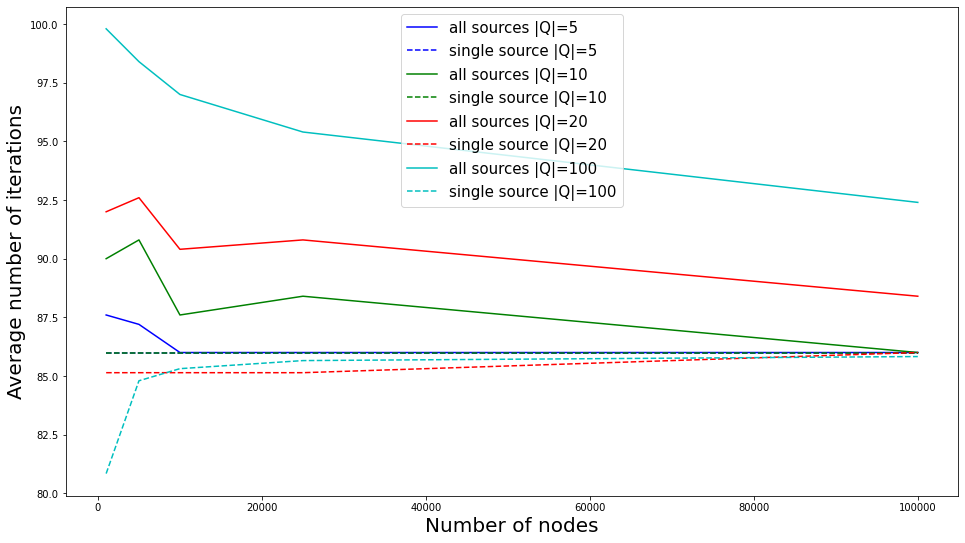

In [105]:
plt.figure(figsize=(16,9))
for i in range(len(query_sizes)):
    df_loc = df[df['query_size'] == query_sizes[i]].groupby(['num_nodes']).mean()
    num_iterations = df_loc['num_iterations'].values
    num_iterations_single_source = df_loc['single_source_avg_num_iterations'].values
    plt.plot(num_nodes, num_iterations, label='all sources |Q|='+str(query_sizes[i]), color=colors[i])
    plt.plot(num_nodes, num_iterations_single_source, label='single source |Q|='+str(query_sizes[i]), color=colors[i], linestyle='dashed')

plt.legend(fontsize=15)
plt.xlabel('Number of nodes', fontsize=20)
plt.ylabel('Average number of iterations', fontsize=20)

## Runtime vs. Number of Nodes

Text(0, 0.5, 'Average runtime (s)')

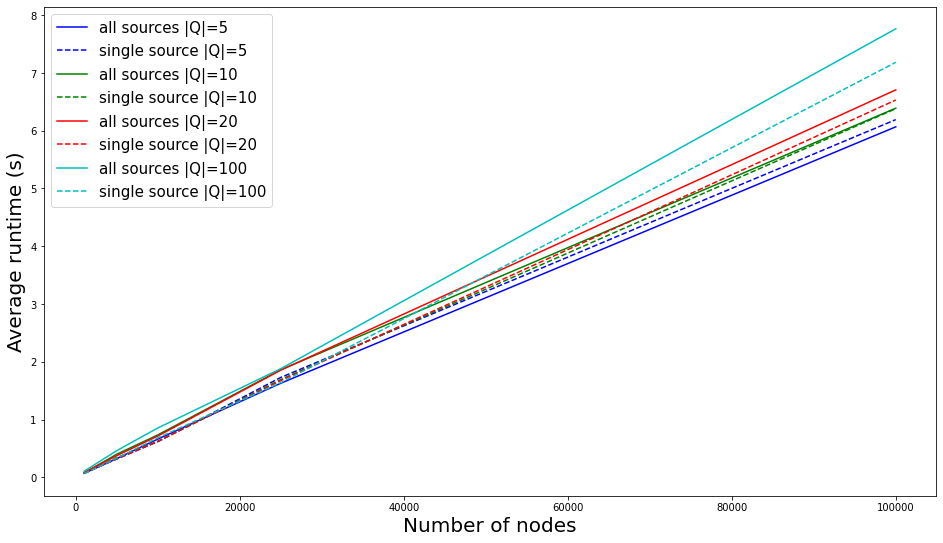

In [106]:
plt.figure(figsize=(16,9))
for i in range(len(query_sizes)):
    df_loc = df[df['query_size'] == query_sizes[i]].groupby(['num_nodes']).mean()
    runtime = df_loc['runtime'].values
    runtime_single_source = df_loc['single_source_avg_runtime'].values
    plt.plot(num_nodes, runtime, label='all sources |Q|='+str(query_sizes[i]), color=colors[i])
    plt.plot(num_nodes, runtime_single_source, label='single source |Q|='+str(query_sizes[i]), color=colors[i], linestyle='dashed')

plt.legend(fontsize=15)
plt.xlabel('Number of nodes', fontsize=20)
plt.ylabel('Average runtime (s)', fontsize=20)

## NDCG (k=1) vs. Number of Nodes

Text(0, 0.5, 'NDCG (k=1)')

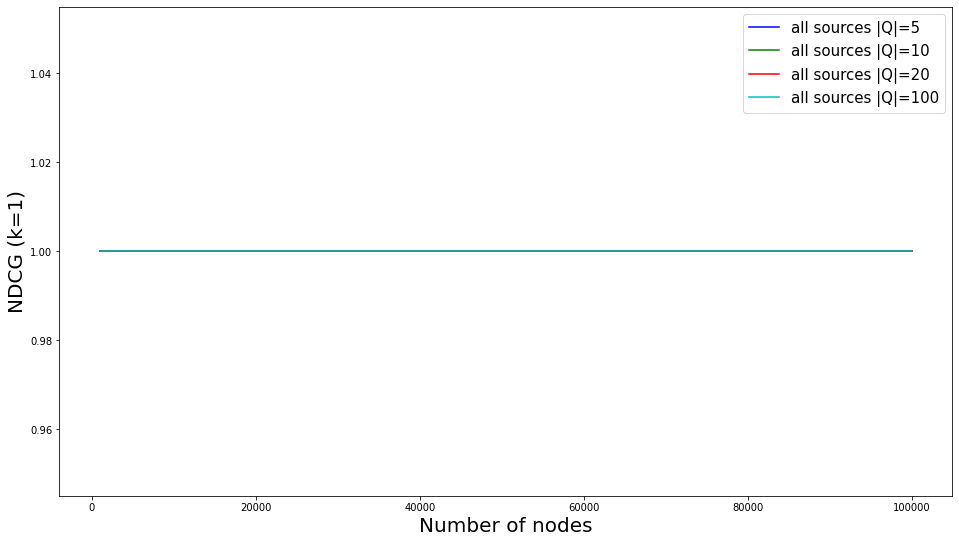

In [107]:
plt.figure(figsize=(16,9))
for i in range(len(query_sizes)):
    df_loc = df[df['query_size'] == query_sizes[i]].groupby(['num_nodes']).mean()
    ndcg_scores = df_loc['ndcg_k=1'].values
    plt.plot(num_nodes, ndcg_scores, label='all sources |Q|='+str(query_sizes[i]), color=colors[i])

plt.legend(fontsize=15)
plt.xlabel('Number of nodes', fontsize=20)
plt.ylabel('NDCG (k=1)', fontsize=20)

Text(0, 0.5, 'NDCG (k=full)')

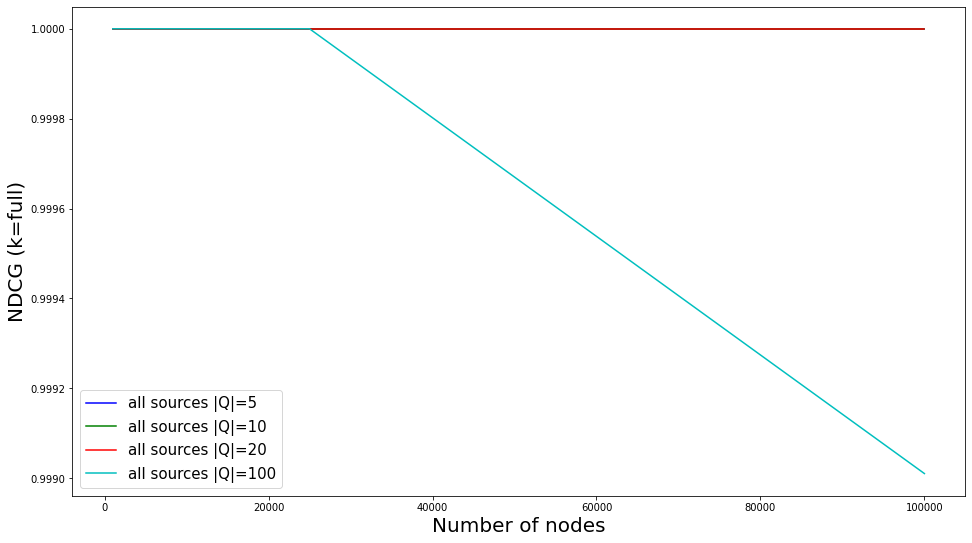

In [108]:
plt.figure(figsize=(16,9))
for i in range(len(query_sizes)):
    df_loc = df[df['query_size'] == query_sizes[i]].groupby(['num_nodes']).mean()
    ndcg_scores = df_loc['ndcg_k=full'].values
    plt.plot(num_nodes, ndcg_scores, label='all sources |Q|='+str(query_sizes[i]), color=colors[i])

plt.legend(fontsize=15)
plt.xlabel('Number of nodes', fontsize=20)
plt.ylabel('NDCG (k=full)', fontsize=20)